# Предобработка и анализ данных

## Объединение датасета и удаление лишних данных

In [39]:
import pandas as pd


df_main = pd.read_csv('ETH-BTC-USD.csv')
df_fng = pd.read_csv('fnd_dataset.csv')

df_main = df_main[df_main['Currency'] != 'Etherium'].reset_index(drop=True)
df_main = df_main.drop(['Adj Close', 'Currency'], axis=1)

# временной промежуток: 12/1/2018 - 3/31/2023
start_date = '12/1/2018'
end_date = '3/31/2023'

start_date = pd.to_datetime(start_date)
end_date = pd.to_datetime(end_date)

df_main['Date'] = pd.to_datetime(df_main['Date'])
df_main = df_main[(df_main['Date'] >= start_date) & (df_main['Date'] <= end_date)]
df_main['Range'] = (df_main['Open'] - df_main['Close']).abs()
df_main['ATR'] = (df_main['High'] - df_main['Low']).abs()
df_main = df_main.drop(['Open', 'High', 'Low'], axis=1)
df_main

Date         Close        Volume        Range          ATR
17   2018-12-01   4214.671875  5.375314e+09   190.207520   339.666748
18   2018-12-02   4139.877930  5.262698e+09    60.855468   190.541015
19   2018-12-03   3894.130859  5.089571e+09   253.192871   315.533203
20   2018-12-04   3956.893799  5.028069e+09    70.598877   242.877686
21   2018-12-05   3753.994873  5.302482e+09   204.899902   215.541016
...         ...           ...           ...          ...          ...
1594 2023-03-27  27139.888670  1.818890e+10   854.179690  1431.236330
1595 2023-03-28  27268.130860  1.778360e+10   135.242190   782.900390
1596 2023-03-29  28348.441410  2.068495e+10  1081.410160  1359.880860
1597 2023-03-30  28033.562500  2.243535e+10   316.578130  1439.742180
1598 2023-03-31  28478.484380  1.900133e+10   446.222660  1056.181640

[1582 rows x 5 columns]

In [40]:
df_fng = df_fng.drop(['BTC_Closing', 'BTC_Volume', 'Value_Classification'], axis=1)
df_fng['Date'] = pd.to_datetime(df_fng['Date'])
df_fng = df_fng[(df_fng['Date'] >= start_date) & (df_fng['Date'] <= end_date)]

rename_columns = {
    'Value': 'FnG',
}

df_fng.rename(columns=rename_columns, inplace=True)

df_fng

Date   FnG
303  2018-12-01  13.0
304  2018-12-02  15.0
305  2018-12-03  17.0
306  2018-12-04  12.0
307  2018-12-05  19.0
...         ...   ...
1880 2023-03-27  64.0
1881 2023-03-28  59.0
1882 2023-03-29  57.0
1883 2023-03-30  60.0
1884 2023-03-31  63.0

[1582 rows x 2 columns]

In [41]:
df = pd.merge(df_main, df_fng, on='Date', how='left')
df

Date         Close        Volume        Range          ATR   FnG
0    2018-12-01   4214.671875  5.375314e+09   190.207520   339.666748  13.0
1    2018-12-02   4139.877930  5.262698e+09    60.855468   190.541015  15.0
2    2018-12-03   3894.130859  5.089571e+09   253.192871   315.533203  17.0
3    2018-12-04   3956.893799  5.028069e+09    70.598877   242.877686  12.0
4    2018-12-05   3753.994873  5.302482e+09   204.899902   215.541016  19.0
...         ...           ...           ...          ...          ...   ...
1577 2023-03-27  27139.888670  1.818890e+10   854.179690  1431.236330  64.0
1578 2023-03-28  27268.130860  1.778360e+10   135.242190   782.900390  59.0
1579 2023-03-29  28348.441410  2.068495e+10  1081.410160  1359.880860  57.0
1580 2023-03-30  28033.562500  2.243535e+10   316.578130  1439.742180  60.0
1581 2023-03-31  28478.484380  1.900133e+10   446.222660  1056.181640  63.0

[1582 rows x 6 columns]

## Предобработка данных

In [42]:
df.dtypes

Date      datetime64[ns]
Close            float64
Volume           float64
Range            float64
ATR              float64
FnG              float64
dtype: object

In [43]:
# удаление дубликатов
df = df.drop_duplicates()

# удаление пропущенных данных
df = df.dropna()

# удаление выбросов
df_filtered = df.select_dtypes(include=['float'])
Q1 = df_filtered.quantile(0.25)
Q3 = df_filtered.quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

condition = ((df_filtered >= lower_bound) & (df_filtered <= upper_bound))
df = df[condition.all(axis=1)]
df

Date         Close        Volume        Range          ATR   FnG
0    2018-12-01   4214.671875  5.375314e+09   190.207520   339.666748  13.0
1    2018-12-02   4139.877930  5.262698e+09    60.855468   190.541015  15.0
2    2018-12-03   3894.130859  5.089571e+09   253.192871   315.533203  17.0
3    2018-12-04   3956.893799  5.028069e+09    70.598877   242.877686  12.0
4    2018-12-05   3753.994873  5.302482e+09   204.899902   215.541016  19.0
...         ...           ...           ...          ...          ...   ...
1577 2023-03-27  27139.888670  1.818890e+10   854.179690  1431.236330  64.0
1578 2023-03-28  27268.130860  1.778360e+10   135.242190   782.900390  59.0
1579 2023-03-29  28348.441410  2.068495e+10  1081.410160  1359.880860  57.0
1580 2023-03-30  28033.562500  2.243535e+10   316.578130  1439.742180  60.0
1581 2023-03-31  28478.484380  1.900133e+10   446.222660  1056.181640  63.0

[1389 rows x 6 columns]

## Визуализация данных

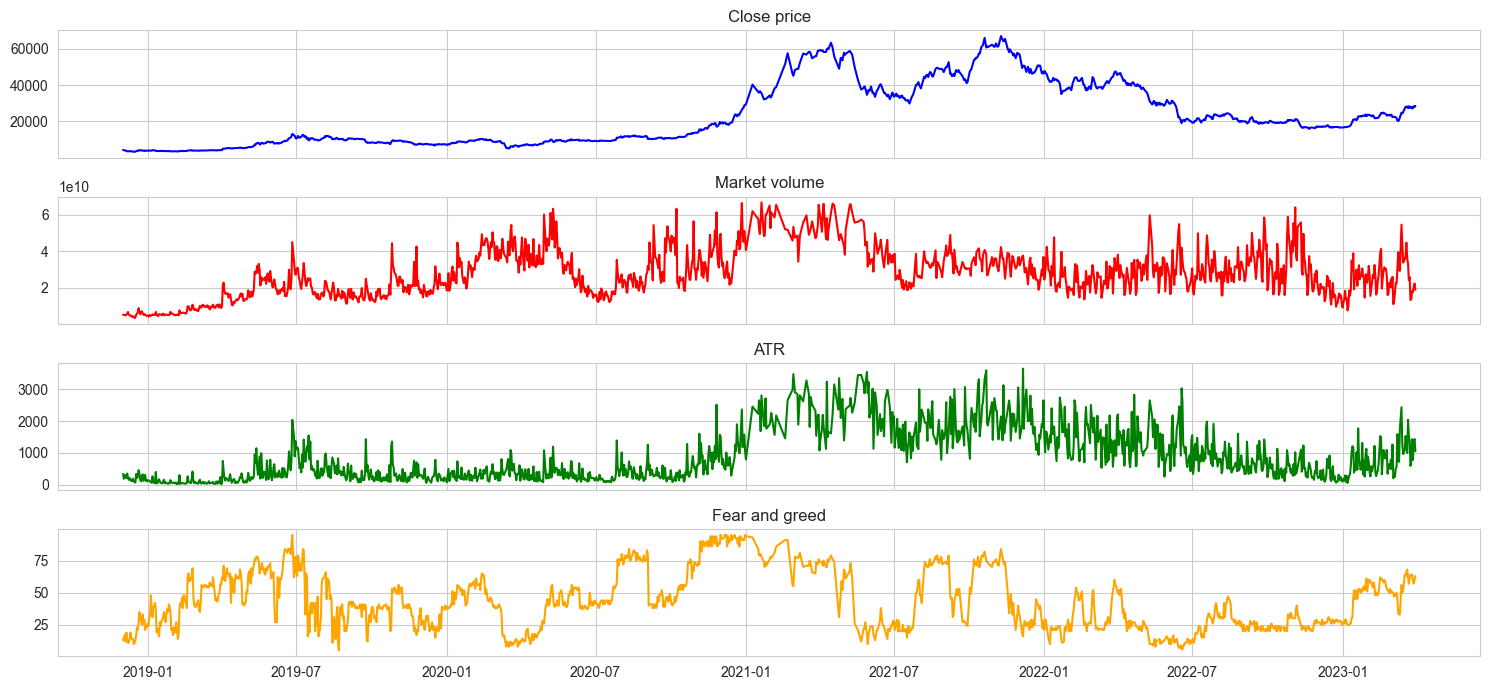

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.rcParams["figure.figsize"] = (15, 7)
sns.set_style("whitegrid")

fig, axs = plt.subplots(4, 1, sharex=True)

axs[0].plot(df['Date'], df['Close'], label='Close', color='blue')
axs[0].set_title('Close price')

axs[1].plot(df['Date'], df['Volume'], label='Volume', color='red')
axs[1].set_title('Market volume')

axs[2].plot(df['Date'], df['ATR'], label='ATR', color='green')
axs[2].set_title('ATR')

axs[3].plot(df['Date'], df['FnG'], label='FnG', color='orange')
axs[3].set_title('Fear and greed')

plt.tight_layout()
plt.show()

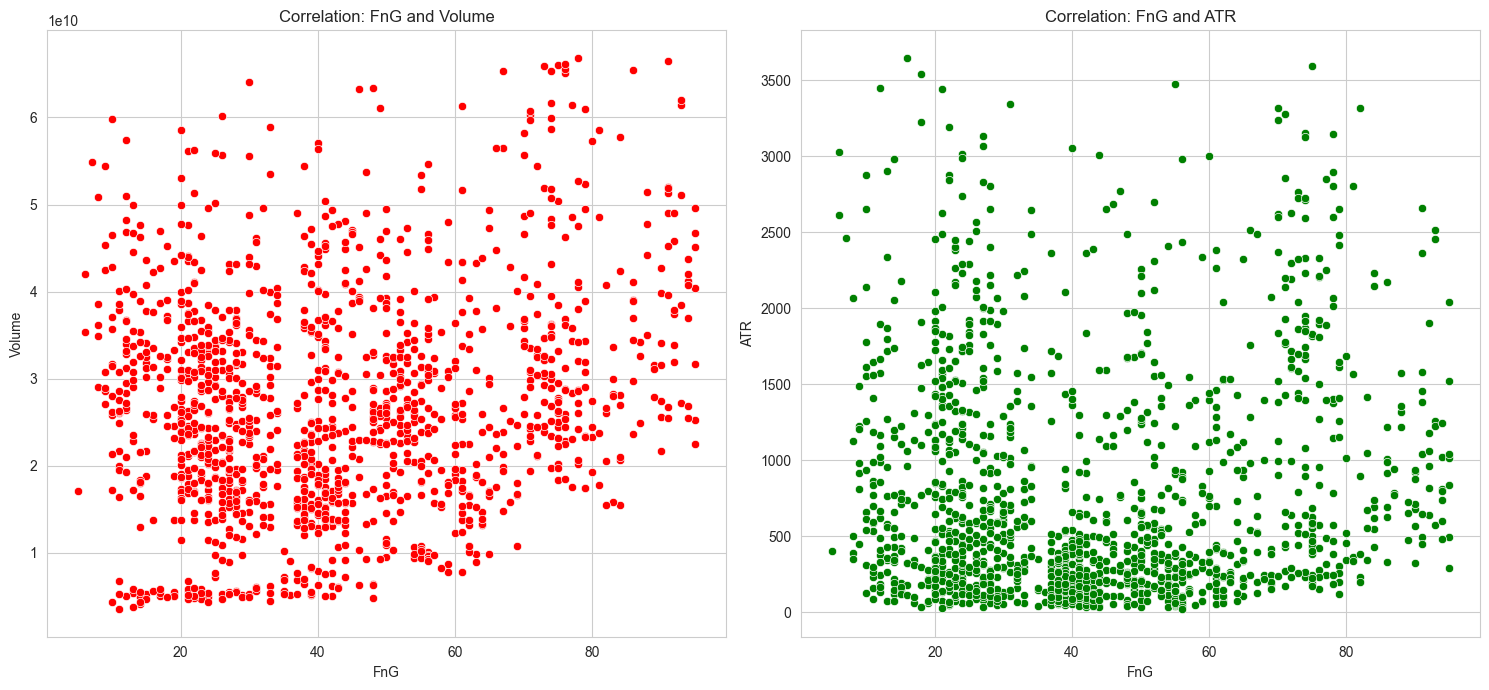

In [45]:
plt.rcParams["figure.figsize"] = (15, 7)
sns.set_style("whitegrid")

# Plotting the correlation plots
fig, axs = plt.subplots(1, 2, sharex=True)

# Correlation between FnG and Volume
sns.scatterplot(x='FnG', y='Volume', data=df, ax=axs[0], color='red')
axs[0].set_title('Correlation: FnG and Volume')

# Correlation between FnG and ATR
sns.scatterplot(x='FnG', y='ATR', data=df, ax=axs[1], color='green')
axs[1].set_title('Correlation: FnG and ATR')

plt.tight_layout()
plt.show()

## Кореляционная матрица

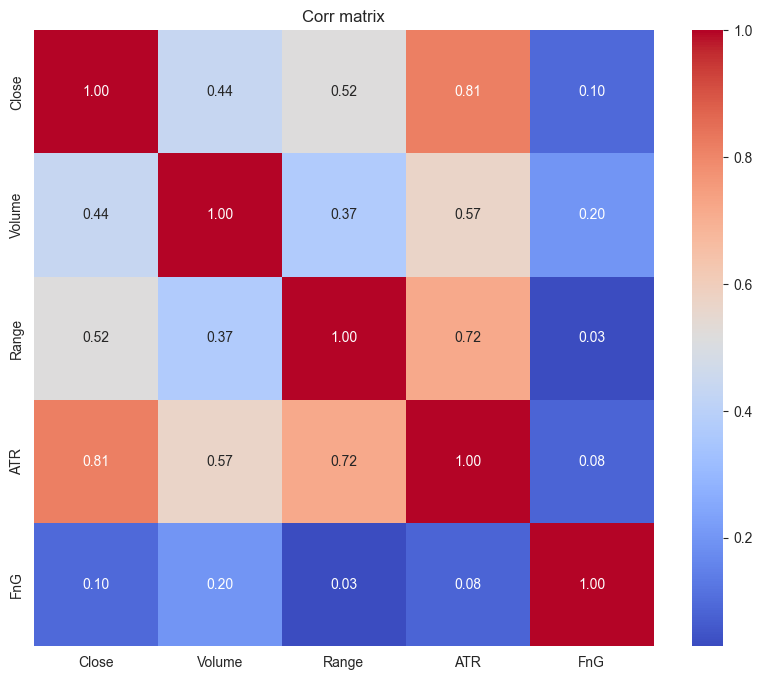

In [46]:
corr_matrix_no_date = df.select_dtypes(include=['float', 'int']).corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix_no_date, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Corr matrix')
plt.show()

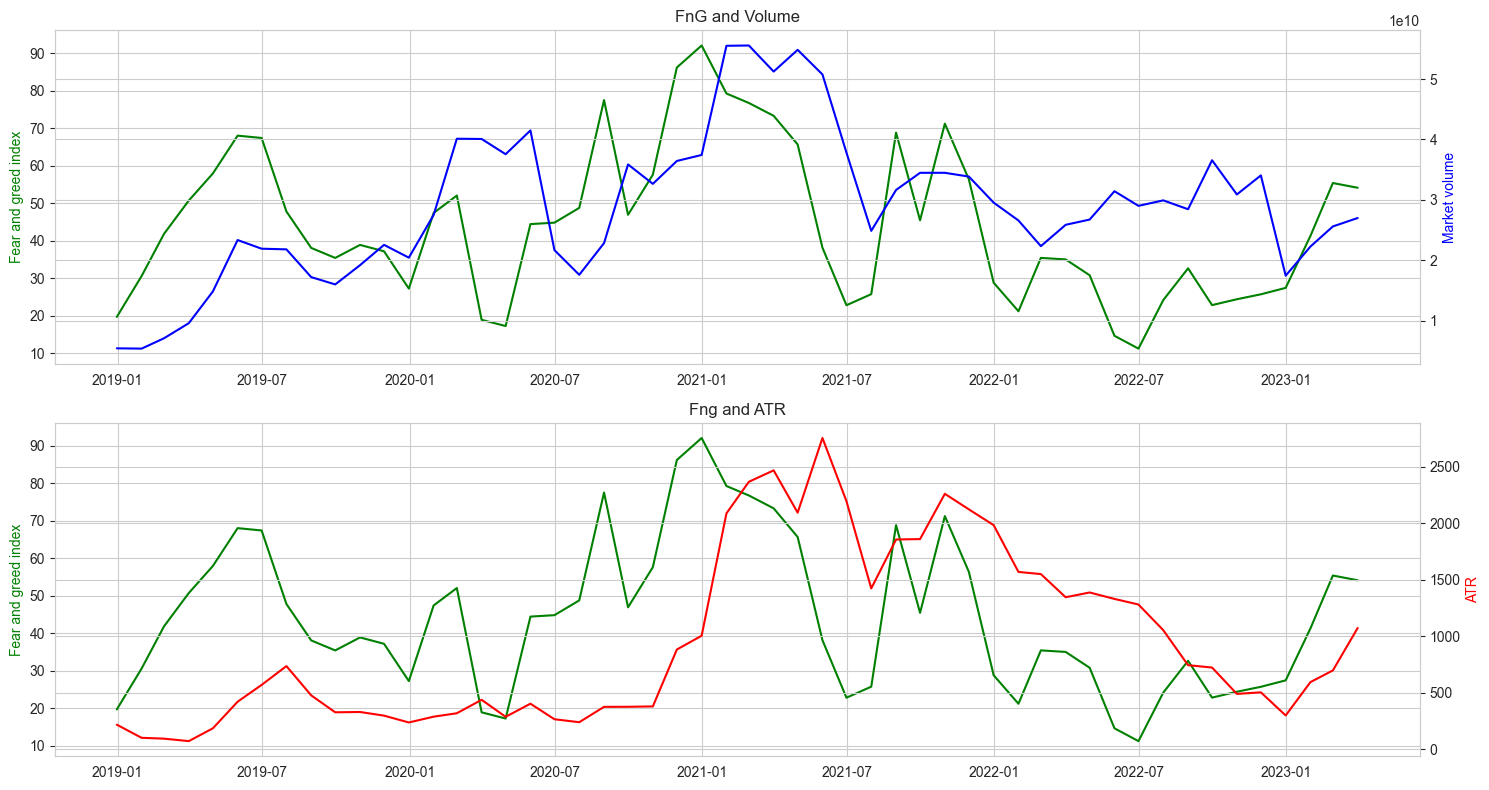

In [47]:
fig, axs = plt.subplots(2, 1, figsize=(15, 8))

df_monthly = df.set_index('Date').resample('ME').mean()

ax1 = axs[0].twinx()
axs[0].plot(df_monthly.index, df_monthly['FnG'], 'g-')
ax1.plot(df_monthly.index, df_monthly['Volume'], 'b-')
axs[0].set_ylabel('Fear and greed index', color='g')
ax1.set_ylabel('Market volume', color='b')
axs[0].set_title('FnG and Volume')

ax2 = axs[1].twinx()
axs[1].plot(df_monthly.index, df_monthly['FnG'], 'g-')
ax2.plot(df_monthly.index, df_monthly['ATR'], 'r-')
axs[1].set_ylabel('Fear and greed index', color='g')
ax2.set_ylabel('ATR', color='r')
axs[1].set_title('Fng and ATR')

plt.tight_layout()
plt.show()

# Решение задачи регрессии

Выбранные модели:

- Linear Regression
- Decision Tree
- Random Forest
- Gradient Boosting
- SVR

In [48]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
    "SVR": SVR()
}

X = df.select_dtypes(include=['float']).drop('FnG', axis=1)
y = df['FnG']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Масштабирование
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Обучение моделей и вычисление метрик
results = {}
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    predictions = model.predict(X_test_scaled)
    mae = mean_absolute_error(y_test, predictions)
    mse = mean_squared_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    results[name] = {"MAE": mae, "MSE": mse, "R^2": r2}

results_df = pd.DataFrame(results).T
results_df

MAE         MSE       R^2
Linear Regression  17.289370  431.375607  0.051975
Decision Tree      13.607914  465.089928 -0.022119
Random Forest       9.778993  182.851109  0.598152
Gradient Boosting  11.048037  215.314329  0.526808
SVR                16.263280  419.545904  0.077973

## Определение значимости признаков для лучшей модели

Лучшая модель - Random Forest

In [49]:
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train_scaled, y_train)

feature_importances = rf.feature_importances_
feature_names = X_train.columns

# Вывод значимости признаков
importances_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
importances_df.sort_values(by='Importance', ascending=False, inplace=True)

importances_df

Feature  Importance
0   Close    0.541766
1  Volume    0.239970
3     ATR    0.130944
2   Range    0.087320

## Определение работы модели с половиной главных признаков

In [50]:
X_train_reduced = X_train_scaled[:, :2]
X_test_reduced = X_test_scaled[:, :2]

# Повторное обучение модели Random Forest на урезанном наборе признаков
rf_reduced = RandomForestRegressor(random_state=42)
rf_reduced.fit(X_train_reduced, y_train)

predictions_reduced = rf_reduced.predict(X_test_reduced)
mae_reduced = mean_absolute_error(y_test, predictions_reduced)
mse_reduced = mean_squared_error(y_test, predictions_reduced)
r2_reduced = r2_score(y_test, predictions_reduced)

results_reduced = {}
results_reduced['Random Forest reduced'] = {"MAE": mae_reduced, "MSE": mse_reduced, "R^2": r2_reduced}
results_reduced['Random Forest'] = results['Random Forest']

results_df = pd.DataFrame(results_reduced).T
results_df

MAE         MSE       R^2
Random Forest reduced  9.695755  180.237074  0.603897
Random Forest          9.778993  182.851109  0.598152

## Подбор оптимальных параметров для лучшей модели

In [51]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

param_grid = {
    'n_estimators': range(60, 150, 5),
    'learning_rate': [0.05, 0.1, 0.15],
    'max_depth': range(2, 5)
}

# Масштабирование
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_reduced)
X_test_scaled = scaler.transform(X_test_reduced)

gb_model = GradientBoostingRegressor(random_state=42)

grid_search = GridSearchCV(gb_model, param_grid, cv=2, scoring='neg_mean_squared_error', n_jobs=-1)

grid_search.fit(X_train_scaled, y_train)

best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Предсказания лучшей модели на тестовой выборке
y_pred_best = best_model.predict(X_test_scaled)

mae_best = mean_absolute_error(y_test, y_pred_best)
mse_best = mean_squared_error(y_test, y_pred_best)  # Обратите внимание, что mse_best будет положительным значением
r2_best = r2_score(y_test, y_pred_best)

best_params, mae_best, mse_best, r2_best

({'learning_rate': 0.15, 'max_depth': 3, 'n_estimators': 60},
 10.73519212536508,
 207.01070658793145,
 0.5450568366189936)

## Оценка работы на основе кросс-валидации

MSE cross-validation: 270.02474626749864


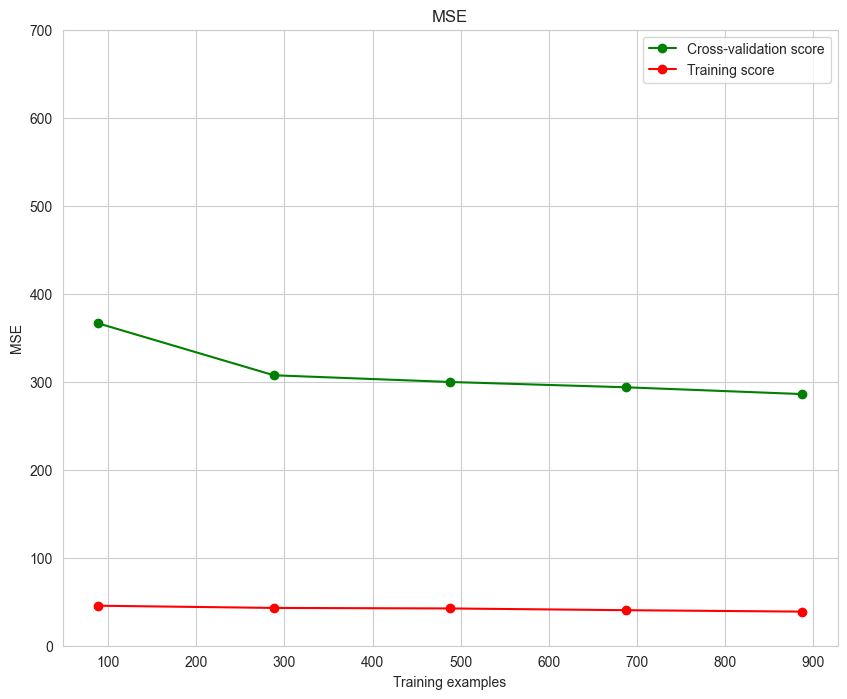

In [52]:
from sklearn.model_selection import cross_val_score, learning_curve
import matplotlib.pyplot as plt
import numpy as np

scores_reduced = cross_val_score(rf_reduced, X_train_reduced, y_train, cv=4, scoring='neg_mean_squared_error')
print(f"MSE cross-validation: {-np.mean(scores_reduced)}")

train_sizes, train_scores, test_scores = learning_curve(rf_reduced, X_train_reduced, y_train, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 5))

train_scores_mean = -np.mean(train_scores, axis=1)
test_scores_mean = -np.mean(test_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure(figsize=(10, 8))
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")

plt.xlabel("Training examples")
plt.ylabel("MSE") 
plt.title("MSE")
plt.ylim(0, 700) 
plt.legend(loc="best")
plt.show()

# Решение задачи классификации

Целевая переменная - FnG

Модели для классификации:

- Logistic Regression
- Random Forest Classifier
- Gradient Boosting Classifier
- KNeighbors Classifier
- SVC


In [53]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

df_3 = df.copy()
df_3['FnG_quantile'] = pd.qcut(df['FnG'], 3, labels=False)

# Разделение на признаки и целевую переменную
X = df_3.drop(columns=['Date', 'FnG', 'FnG_quantile'])
y = df_3['FnG_quantile']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Масштабирование
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(n_estimators=100),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "SVM": SVC()
}

results_3 = {}

# Обучение моделей и оценка
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='macro')
    recall = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')
    
    results_3[name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1
    }

results_df_3 = pd.DataFrame(results_3).T
results_df_3

Accuracy  Precision    Recall  F1 Score
Logistic Regression  0.449640   0.475238  0.454258  0.439766
Random Forest        0.701439   0.706447  0.700580  0.702478
Gradient Boosting    0.715827   0.726648  0.716309  0.717440
KNN                  0.579137   0.579925  0.579166  0.576304
SVM                  0.532374   0.548702  0.534473  0.527670

## Подбор параметров для лучшей модели

Лучшие показатели в итоге выполнения программы оказлись у GradientBoosting

In [54]:
from sklearn.model_selection import GridSearchCV


param_grid = {
    'n_estimators': range(20, 100, 5),
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': range(2, 7)
}

gb_model = GradientBoostingClassifier(random_state=42)

grid_search = GridSearchCV(gb_model, param_grid, cv=2, scoring='accuracy', n_jobs=-1)

grid_search.fit(X_train_scaled, y_train)

best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

y_pred_best = best_model.predict(X_test_scaled)

accuracy_best = accuracy_score(y_test, y_pred_best)
precision_best = precision_score(y_test, y_pred_best, average='macro')
recall_best = recall_score(y_test, y_pred_best, average='macro')
f1_best = f1_score(y_test, y_pred_best, average='macro')

best_params, accuracy_best, precision_best, recall_best, f1_best

({'learning_rate': 0.05, 'max_depth': 4, 'n_estimators': 25},
 0.7086330935251799,
 0.7128557561638518,
 0.7088054825085665,
 0.7063793938628082)

## Уменьшение размерности

Использованные модели (из п. 2):

- Linear Regression
- Decision Tree
- Random Forest
- Gradient Boosting
- SVR

In [55]:
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


X = df.drop(columns=['Date', 'FnG'])
y = df['FnG']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Масштабирование признаков
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

pca = PCA(n_components=0.9)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
    "SVR": SVR()
}

# Функция для обучения и оценки моделей
def evaluate_models(X_train, X_test, y_train, y_test, models):
    results = {}
    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        r2 = r2_score(y_test, y_pred)
        mse = mean_squared_error(y_test, y_pred)
        mae = mean_absolute_error(y_test, y_pred)
        results[name] = {"MAE": mae, "MSE": mse, "R^2": r2}
    return results

results_original = evaluate_models(X_train_scaled, X_test_scaled, y_train, y_test, models)

results_pca = evaluate_models(X_train_pca, X_test_pca, y_train, y_test, models)

df_original = pd.DataFrame(results_original).T
df_pca = pd.DataFrame(results_pca).T

df_original['Data'] = 'Original'
df_pca['Data'] = 'PCA'

df_comparison = pd.concat([df_original, df_pca])
df_comparison.reset_index(inplace=True)
df_comparison.rename(columns={'index': 'Model'}, inplace=True)

df_comparison

Model        MAE         MSE       R^2      Data
0  Linear Regression  17.289370  431.375607  0.051975  Original
1      Decision Tree  13.607914  465.089928 -0.022119  Original
2      Random Forest   9.778993  182.851109  0.598152  Original
3  Gradient Boosting  11.048037  215.314329  0.526808  Original
4                SVR  16.263280  419.545904  0.077973  Original
5  Linear Regression  17.232768  429.526634  0.056038       PCA
6      Decision Tree  18.287770  643.798561 -0.414863       PCA
7      Random Forest  14.994460  393.691185  0.134793       PCA
8  Gradient Boosting  16.031515  406.732291  0.106133       PCA
9                SVR  16.444034  428.416585  0.058478       PCA

# Кластеризация

Использованные модели:

- AgglomerativeClustering
- KMeans
- DBSCAN 

In [56]:
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd

X = df.select_dtypes(include=[np.number])

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

kmeans = KMeans(n_clusters=5, random_state=42)
agglo = AgglomerativeClustering(n_clusters=5)
dbscan = DBSCAN(eps=0.5, min_samples=5)

# Применение моделей кластеризации к масштабированным данным
kmeans_clusters = kmeans.fit_predict(X_scaled)
agglo_clusters = agglo.fit_predict(X_scaled)
dbscan_clusters = dbscan.fit_predict(X_scaled)

metrics = {}
models = ['KMeans', 'Agglomerative', 'DBSCAN']
clusters_list = [kmeans_clusters, agglo_clusters, dbscan_clusters]

# Расчет метрик для каждой модели
for name, clusters in zip(models, clusters_list):

    if name == 'DBSCAN':
        valid_clusters = clusters[clusters != -1]
        valid_points = X_scaled[clusters != -1]

    else:
        valid_clusters = clusters
        valid_points = X_scaled

    # Расчет метрик кластеризации
    silhouette = silhouette_score(valid_points, valid_clusters)
    davies_bouldin = davies_bouldin_score(valid_points, valid_clusters)
    calinski_harabasz = calinski_harabasz_score(valid_points, valid_clusters)
    
    metrics[name] = {
        'Silhouette Score': silhouette,
        'Davies-Bouldin Score': davies_bouldin,
        'Calinski-Harabasz Score': calinski_harabasz
    }

metrics_df_5 = pd.DataFrame(metrics).T
metrics_df_5

Silhouette Score  Davies-Bouldin Score  Calinski-Harabasz Score
KMeans                 0.280117              1.278393               625.190155
Agglomerative          0.247221              1.347289               530.648227
DBSCAN                 0.045106              0.937924                38.558131

## Визуализация

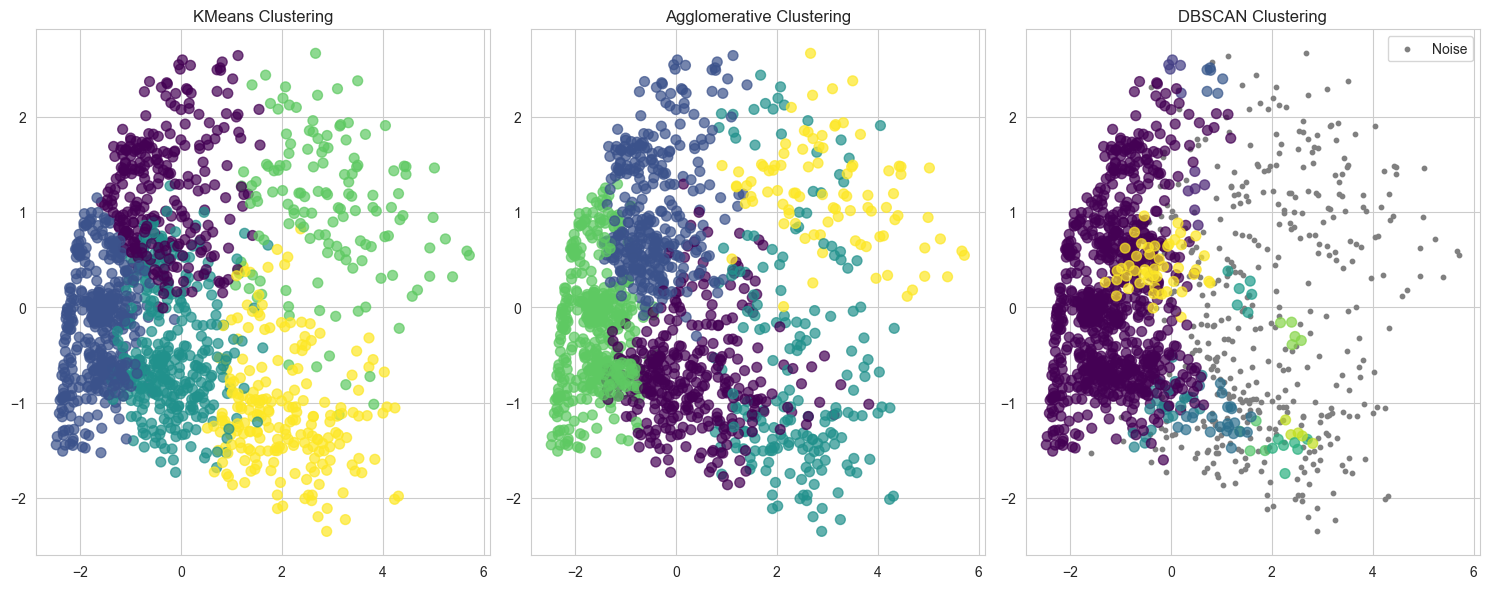

In [57]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Использование subplots для визуализации результатов кластеризации трех моделей
fig, axes = plt.subplots(1, 3, figsize=(15, 6))

# Визуализация для KMeans
axes[0].scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans_clusters, s=50, cmap='viridis', alpha=0.7)
axes[0].set_title('KMeans Clustering')
# Визуализация для Agglomerative Clustering
axes[1].scatter(X_pca[:, 0], X_pca[:, 1], c=agglo_clusters, s=50, cmap='viridis', alpha=0.7)
axes[1].set_title('Agglomerative Clustering')

# Визуализация для DBSCAN
axes[2].scatter(X_pca[dbscan_clusters == -1, 0], X_pca[dbscan_clusters == -1, 1], color='grey', s=10, label='Noise')
axes[2].scatter(X_pca[dbscan_clusters != -1, 0], X_pca[dbscan_clusters != -1, 1], c=dbscan_clusters[dbscan_clusters != -1], s=50, cmap='viridis', alpha=0.7)
axes[2].set_title('DBSCAN Clustering')
axes[2].legend()

plt.tight_layout()
plt.show()